In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import quandl
%matplotlib inline

In [2]:
symbols = ['EOD/IBM', 'EOD/CSCO', 'EOD/MSFT','EOD/INTC', 'EOD/NKE', 'EOD/MCD']
data = pd.DataFrame()
for s in symbols:
    data[s] = quandl.get(s, authtoken="zcZC7_EBcYw9FV6ocxWh", start_date = '1997-01-01')["Adj_Close"] 


In [4]:
data.tail()

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
Date,,,,,,
2019-02-05,133.970796,47.26,107.22,49.696286,82.86,177.57
2019-02-06,134.731825,47.48,106.03,49.900000,82.71,176.18
2019-02-07,133.190000,46.70,105.27,49.230000,82.39,175.28
2019-02-08,133.710000,47.19,105.67,48.840000,82.36,174.75
2019-02-11,133.990000,47.58,105.25,48.770000,83.68,174.26


In [5]:
data.head()

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
Date,,,,,,
1997-01-02,26.048832,5.558811,6.675933,10.641383,5.647787,13.655700
1997-01-03,27.048291,5.801921,6.921311,11.294229,5.730188,13.616364
1997-01-06,27.408640,5.967235,6.900863,11.335032,5.753866,13.580053
1997-01-07,27.770689,6.033538,6.952393,11.702258,5.671465,13.389424
1997-01-08,27.175773,5.856731,6.819070,11.612491,5.635474,13.353114


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5564 entries, 1997-01-02 to 2019-02-11
Data columns (total 6 columns):
EOD/IBM     5564 non-null float64
EOD/CSCO    5564 non-null float64
EOD/MSFT    5564 non-null float64
EOD/INTC    5564 non-null float64
EOD/NKE     5564 non-null float64
EOD/MCD     5564 non-null float64
dtypes: float64(6)
memory usage: 304.3 KB


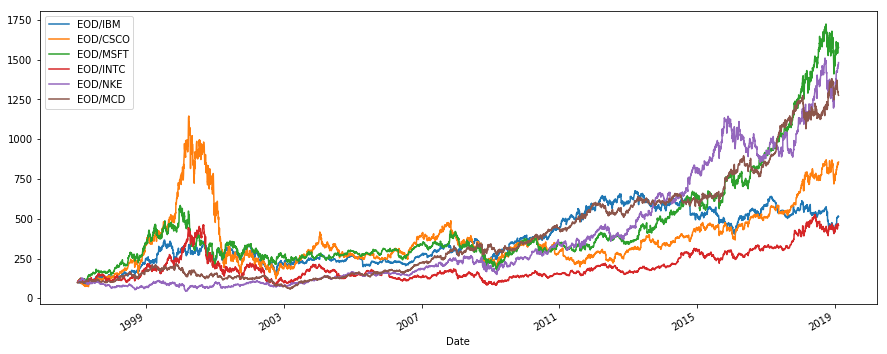

In [7]:
(data/data.iloc[0] * 100).plot(figsize=(15,6))

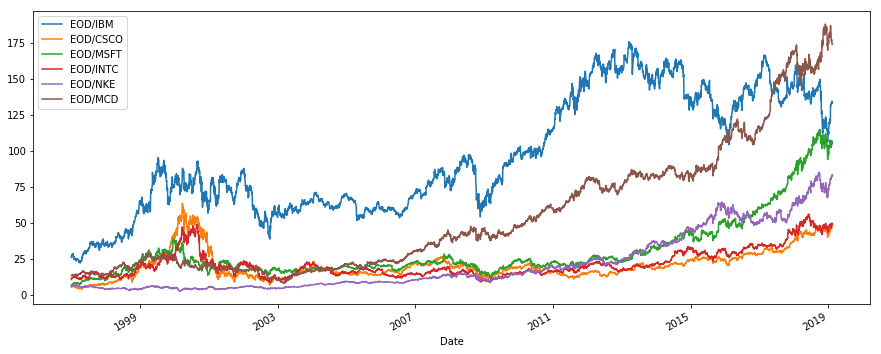

In [8]:
data.plot(figsize=(15,6))

In [9]:
simple_returns = (data/data.shift(1) - 1)
simple_returns.head()

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
Date,,,,,,
1997-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-03,0.038369,0.043734,0.036756,0.061350,0.014590,-0.002881
1997-01-06,0.013322,0.028493,-0.002954,0.003613,0.004132,-0.002667
1997-01-07,0.013209,0.011111,0.007467,0.032397,-0.014321,-0.014037
1997-01-08,-0.021422,-0.029304,-0.019176,-0.007671,-0.006346,-0.002712


In [10]:
annual_returns = simple_returns.mean() * 250
annual_returns.head()

EOD/IBM     0.111207
EOD/CSCO    0.175076
EOD/MSFT    0.172998
EOD/INTC    0.140161
EOD/NKE     0.172038
dtype: float64

In [11]:
weights1 = np.array([0.1, 0.2, 0.1, 0.2, 0.2, 0.2])

In [12]:
#To calculate the return of the portfolio
np.dot(annual_returns, weights1)

0.15449696209930922

In [13]:
portfolio_returns = str(round(np.dot(annual_returns, weights1), 5) * 100) + '%'
portfolio_returns

'15.45%'

In [14]:
log_returns = np.log(data/data.shift(1))
log_returns.head()

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
Date,,,,,,
1997-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-03,0.037651,0.042805,0.036096,0.059541,0.014485,-0.002885
1997-01-06,0.013234,0.028095,-0.002959,0.003606,0.004124,-0.002670
1997-01-07,0.013123,0.011050,0.007439,0.031884,-0.014425,-0.014137
1997-01-08,-0.021655,-0.029742,-0.019363,-0.007700,-0.006366,-0.002716


In [15]:
log_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5564 entries, 1997-01-02 to 2019-02-11
Data columns (total 6 columns):
EOD/IBM     5563 non-null float64
EOD/CSCO    5563 non-null float64
EOD/MSFT    5563 non-null float64
EOD/INTC    5563 non-null float64
EOD/NKE     5563 non-null float64
EOD/MCD     5563 non-null float64
dtypes: float64(6)
memory usage: 304.3 KB


In [16]:
risk = log_returns[['EOD/IBM', 'EOD/MSFT', 'EOD/CSCO', 'EOD/INTC', 'EOD/NKE', 'EOD/MCD']].std() * 250 ** 0.5

In [17]:
print(str(round(risk, 5) * 100) + '%') 

EOD/IBM     27.426
EOD/MSFT    31.309
EOD/CSCO    39.615
EOD/INTC    37.924
EOD/NKE     31.898
EOD/MCD     23.932
dtype: float64%


In [18]:
annual_variance = log_returns.var() * 250
annual_variance

EOD/IBM     0.075217
EOD/CSCO    0.156935
EOD/MSFT    0.098025
EOD/INTC    0.143824
EOD/NKE     0.101746
EOD/MCD     0.057274
dtype: float64

In [19]:
annual_cov_matrix = log_returns.cov() * 250
annual_cov_matrix

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
EOD/IBM,0.075217,0.056045,0.040761,0.051499,0.026481,0.018614
EOD/CSCO,0.056045,0.156935,0.069371,0.091369,0.038394,0.026560
EOD/MSFT,0.040761,0.069371,0.098025,0.069785,0.030959,0.020492
EOD/INTC,0.051499,0.091369,0.069785,0.143824,0.036022,0.022980
EOD/NKE,0.026481,0.038394,0.030959,0.036022,0.101746,0.021072
EOD/MCD,0.018614,0.026560,0.020492,0.022980,0.021072,0.057274


In [20]:
#Correlation between the returns(logarithmic) of the stocks
corr_matrix = log_returns.corr()
corr_matrix

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
EOD/IBM,1.000000,0.515841,0.474694,0.495138,0.302704,0.283602
EOD/CSCO,0.515841,1.000000,0.559302,0.608166,0.303843,0.280148
EOD/MSFT,0.474694,0.559302,1.000000,0.587728,0.309998,0.273486
EOD/INTC,0.495138,0.608166,0.587728,1.000000,0.297780,0.253192
EOD/NKE,0.302704,0.303843,0.309998,0.297780,1.000000,0.276036
EOD/MCD,0.283602,0.280148,0.273486,0.253192,0.276036,1.000000


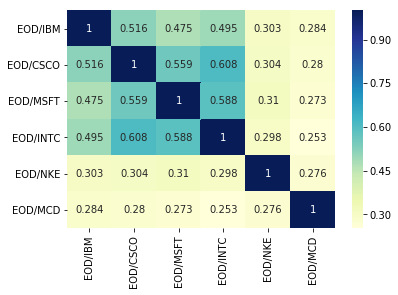

In [21]:
sns.heatmap(log_returns.corr(), annot=True, fmt=".3g", cmap="YlGnBu")

In [22]:
#Correlation between the prices of the stock
prices_corr_martix = data.corr()
prices_corr_martix

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
EOD/IBM,1.000000,0.367321,0.582625,0.532739,0.746926,0.805393
EOD/CSCO,0.367321,1.000000,0.693352,0.870140,0.511574,0.519990
EOD/MSFT,0.582625,0.693352,1.000000,0.866055,0.902877,0.901427
EOD/INTC,0.532739,0.870140,0.866055,1.000000,0.746006,0.734233
EOD/NKE,0.746926,0.511574,0.902877,0.746006,1.000000,0.959954
EOD/MCD,0.805393,0.519990,0.901427,0.734233,0.959954,1.000000


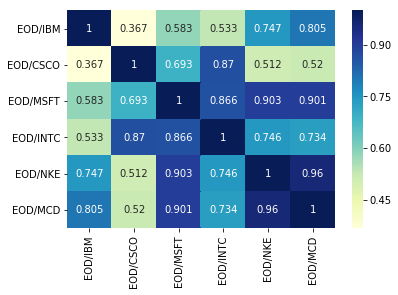

In [23]:
sns.heatmap(data.corr(), annot=True, fmt=".3g", cmap="YlGnBu")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


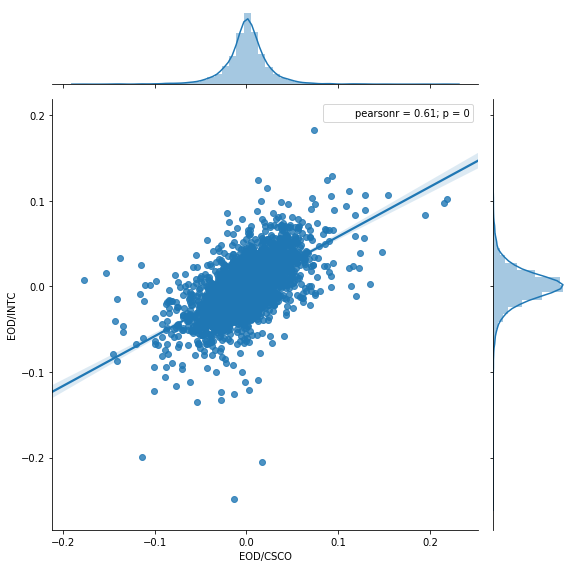

In [24]:
sns.jointplot(log_returns['EOD/CSCO'], log_returns['EOD/INTC'], log_returns, kind='reg',size=8)

In [25]:
weights2 = np.array([0.1, 0.2, 0.1, 0.2, 0.2, 0.2])

In [26]:
portfolio_variance = np.dot(weights2.T, np.dot(log_returns.cov() * 250, weights2))
portfolio_variance

0.05358037984394599

In [27]:
portfolio_risk = (np.dot(weights2.T, np.dot(log_returns.cov() * 250, weights2))) ** 0.5
portfolio_risk

0.23147436109415226

In [28]:
print(str(round(portfolio_risk, 5) * 100) + '%')

23.147000000000002%


In [29]:
# CAlCULATING THE ANNUAL DIVERSIFIABLE AND NON-DIVERSIFIABLE RISKS

In [30]:
weights2

array([0.1, 0.2, 0.1, 0.2, 0.2, 0.2])

In [31]:
IBM_var = log_returns['EOD/IBM'].var() * 250
CSCO_var = log_returns['EOD/CSCO'].var() * 250
MSFT_var = log_returns['EOD/MSFT'].var() * 250
INTC_var = log_returns['EOD/INTC'].var() * 250
NKE_var = log_returns['EOD/NKE'].var() * 250
MCD_var = log_returns['EOD/MCD'].var() * 250
print(IBM_var)
print(CSCO_var)
print(MSFT_var)
print(INTC_var)
print(NKE_var)
print(MCD_var)

0.07521728283039199
0.15693493835170708
0.09802548040182175
0.14382400866922848
0.10174606253252737
0.05727382436012697


In [32]:
d_risk = portfolio_variance - (weights2[0] ** 2 * IBM_var) - (weights2[1] ** 2 * CSCO_var) - (weights2[2] ** 2 * MSFT_var) - (weights2[3] ** 2 * INTC_var) - (weights2[4] ** 2 * NKE_var) - (weights2[5] ** 2 * MCD_var)

In [33]:
print(str(round(d_risk, 5) * 100) + '%')

3.3459999999999996%


In [34]:
nd_risk = portfolio_variance - d_risk

In [35]:
print(str(round(nd_risk, 5) * 100) + '%')

2.012%


# Obtaining the Efficient Frontier

In [36]:
num_assets = len(symbols)
num_assets

6

In [37]:
pfolio_returns = []
pfolio_volatilities = []
for x in range(1000):
    weights = np.random.random(len(symbols))
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
                              
pfolio_returns, pfolio_volatilities                          

(array([0.08892978, 0.10326574, 0.09624787, 0.10269281, 0.10201825,
        0.10407437, 0.09843611, 0.11215294, 0.09453969, 0.09703105,
        0.09298436, 0.10599305, 0.11253562, 0.09293295, 0.09387545,
        0.09213511, 0.095949  , 0.10028104, 0.11096691, 0.0959476 ,
        0.09554418, 0.09795338, 0.09801377, 0.10213539, 0.09356043,
        0.10387856, 0.0956168 , 0.10690442, 0.09862037, 0.09402087,
        0.10748272, 0.0969695 , 0.09520561, 0.09651266, 0.09044957,
        0.10155942, 0.09459412, 0.10229599, 0.10468999, 0.09276637,
        0.11315759, 0.10506121, 0.10830521, 0.10819698, 0.09642696,
        0.0979263 , 0.1053852 , 0.09653801, 0.09649888, 0.09591088,
        0.10528241, 0.092314  , 0.09547869, 0.09816434, 0.10328125,
        0.09789391, 0.10654473, 0.09757876, 0.0951937 , 0.09601274,
        0.10369317, 0.11205414, 0.09906208, 0.09644846, 0.09880682,
        0.09796366, 0.10178262, 0.09935324, 0.1027455 , 0.10787453,
        0.0964939 , 0.092156  , 0.09602745, 0.09

In [38]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})
portfolios.head()

,Return,Volatility
0,0.088930,0.246951
1,0.103266,0.212420
2,0.096248,0.226231
3,0.102693,0.236052
4,0.102018,0.231235


Text(0,0.5,'Expected Return')

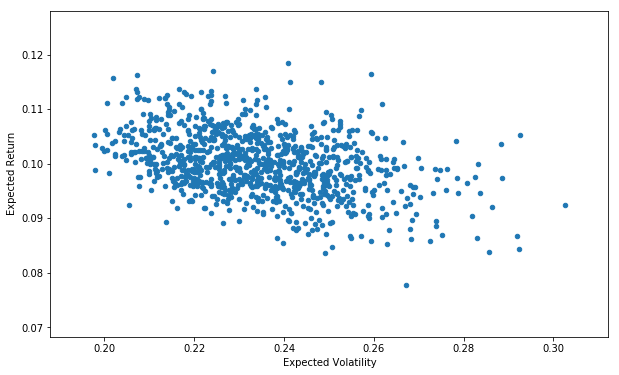

In [39]:
portfolios.plot(x='Volatility', y= 'Return', kind = 'scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

# MONTE CARLO

In [40]:
rev_m = 180
rev_stdev = 25
iterations = 1000

In [41]:
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([189.31899541, 182.17819119, 172.80161832, 238.36776597,
       135.43430054, 154.53195987, 178.19023977, 210.98511089,
       199.75368377, 177.06387297, 184.92276328, 142.10591674,
       159.39320593, 241.1730766 , 180.76893737, 182.69855156,
       194.24092525, 191.83623026, 171.53945508, 122.08081603,
       147.46517588, 152.56011023, 148.85898052, 182.38679936,
       257.02993088, 177.94264364, 197.31874204, 167.97149199,
       169.31238767, 192.2274518 , 170.72570702, 198.30324338,
       159.62432868, 148.42500926, 151.2542457 , 168.99884309,
       165.54746396, 184.09228778, 160.73621576, 218.71590799,
       166.77814956, 190.31327719, 240.35790329, 225.01747231,
       219.13425566, 140.86539153, 149.76012999, 231.9782533 ,
       183.47241137, 157.69642928, 213.46715245, 201.65339778,
       175.47133897, 147.32697577, 150.37189613, 162.82009867,
       175.06260222, 172.0887194 , 186.92861077, 174.36814947,
       204.86348628, 145.14582333, 169.09566051, 195.81

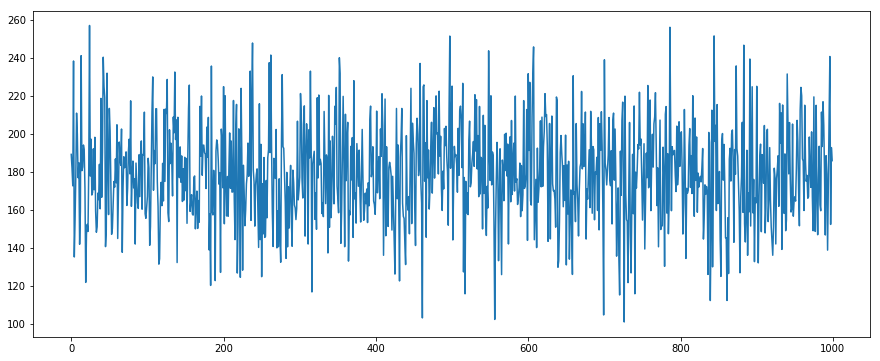

In [42]:
plt.figure(figsize=(15,6))
plt.plot(rev)

In [43]:
COGS = - (rev * np.random.normal(0.6,0.1))
COGS

array([ -89.24036903,  -85.87436763,  -81.45447928, -112.3607663 ,
        -63.84043468,  -72.84260671,  -83.99454434,  -99.45324881,
        -94.15902729,  -83.46360243,  -87.16809215,  -66.98527226,
        -75.13407985, -113.68312149,  -85.21007966,  -86.11965285,
        -91.56044703,  -90.4269323 ,  -80.85952623,  -57.54592692,
        -69.51149665,  -71.91312476,  -70.16850225,  -85.97270045,
       -121.15765686,  -83.87783355,  -93.01125499,  -79.17767522,
        -79.80974082,  -90.61134462,  -80.47594519,  -93.47532497,
        -75.24302549,  -69.96393875,  -71.29757199,  -79.66194354,
        -78.03504738,  -86.7766262 ,  -75.76714202, -103.09735851,
        -78.61516263,  -89.70904928, -113.29886862, -106.06776263,
       -103.29455742,  -66.40051885,  -70.59328219, -109.34890546,
        -86.48443154,  -74.33426061, -100.62322283,  -95.05450626,
        -82.71292065,  -69.44635248,  -70.88165386,  -76.74943373,
        -82.52025209,  -81.11843607,  -88.11359986,  -82.19290

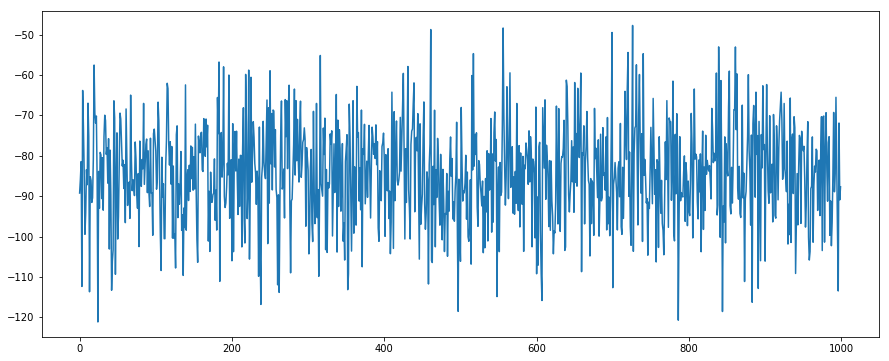

In [44]:
plt.figure(figsize=(15,6))
plt.plot(COGS)

In [45]:
COGS.mean()

-84.48641152758547

In [46]:
COGS.std()

12.288956404868177

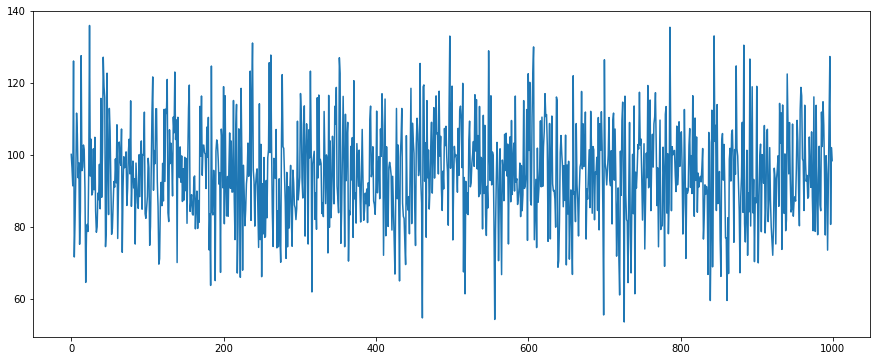

In [47]:
Gross_Profit = rev + COGS
plt.figure(figsize=(15,6))
plt.plot(Gross_Profit)

In [48]:
max(Gross_Profit)

135.87227401643293

In [49]:
min(Gross_Profit)

53.54478719247901

In [50]:
Gross_Profit.mean()

94.74729996308658

In [51]:
Gross_Profit.std()

13.781452161039782

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


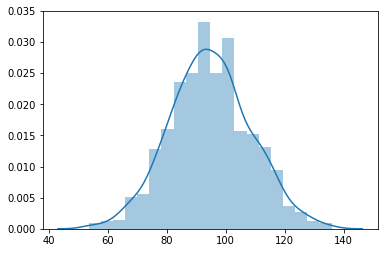

In [52]:
sns.distplot(Gross_Profit, bins=20, kde=True)

In [53]:
CSCO_log_returns = log_returns['EOD/CSCO']


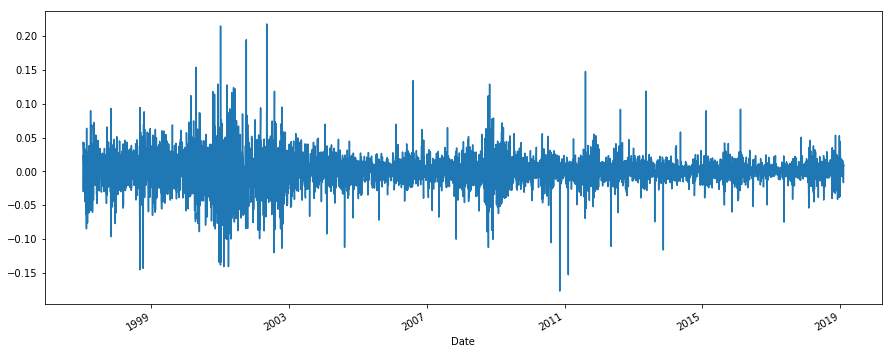

In [54]:
CSCO_log_returns.plot(figsize=(15,6))

In [55]:
u = CSCO_log_returns.mean()
u

0.0003859479099649702

In [56]:
var = CSCO_log_returns.var()
var

0.0006277397534068283

In [57]:
drift = u - (0.5 * var)
drift = pd.Series(drift)
drift

0    0.000072
dtype: float64

In [58]:
stdev = CSCO_log_returns.std()
stdev = pd.Series(stdev) 
stdev

0    0.025055
dtype: float64

In [59]:
type(drift)

pandas.core.series.Series

In [60]:
type(stdev)

pandas.core.series.Series

In [61]:
drift.values

array([7.20780333e-05])

In [62]:
stdev.values

array([0.02505474])

In [63]:
from scipy.stats import norm

In [64]:
t_intervals = 1000
iterations = 50

In [65]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.99635423, 1.02039375, 0.99027866, ..., 0.94383581, 0.97699141,
        1.04691983],
       [1.01955285, 1.01614294, 0.98549696, ..., 0.97817825, 1.01764525,
        0.99205817],
       [0.96407134, 1.03512694, 0.99201952, ..., 1.01111679, 1.01732862,
        0.98630402],
       ...,
       [0.99418644, 0.96977729, 1.05548199, ..., 1.00099672, 1.04323899,
        1.01845271],
       [0.99572601, 1.03160208, 0.99846948, ..., 0.9656484 , 0.99947851,
        0.99418042],
       [0.98755925, 0.9926568 , 0.99506881, ..., 1.01038584, 0.97969292,
        1.05332821]])

In [66]:
S0 = data['EOD/CSCO'].iloc[-1]
S0 

47.58

In [67]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
price_list[0] = S0
price_list

array([[47.58, 47.58, 47.58, ..., 47.58, 47.58, 47.58],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [69]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t-1] * daily_returns[t]

In [70]:
price_list

array([[ 47.58      ,  47.58      ,  47.58      , ...,  47.58      ,
         47.58      ,  47.58      ],
       [ 48.51032447,  48.34808127,  46.88994524, ...,  46.54172109,
         48.41956089,  47.20212754],
       [ 46.76741359,  50.04640137,  46.51574106, ...,  47.05911585,
         49.25860527,  46.55564804],
       ...,
       [ 75.13139498,  10.93114812,  53.56909891, ...,  75.22848527,
        105.30558061, 128.75591531],
       [ 74.81028423,  11.27659513,  53.48711008, ...,  72.64426622,
        105.25066511, 128.00661025],
       [ 73.87958795,  11.19378889,  53.22335472, ...,  73.39873788,
        103.1133318 , 134.83297379]])

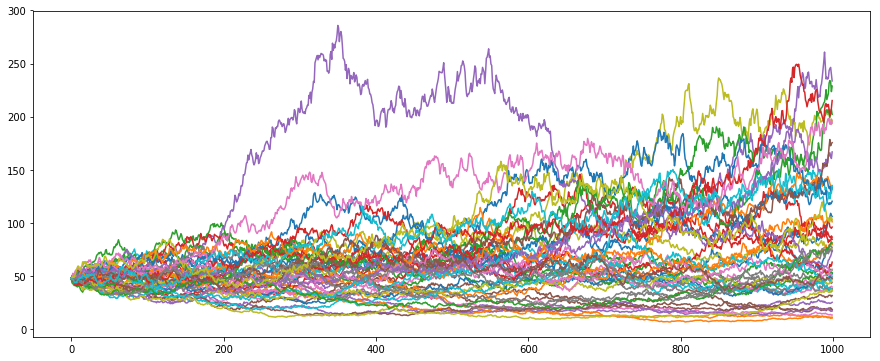

In [71]:
plt.figure(figsize=(15,6))
plt.plot(price_list)

In [72]:
nikkei = pd.read_csv('japan.csv')[['Date', 'Adj Close']]
nikkei.head()

,Date,Adj Close
0,06-01-1997,19446.00000
1,07-01-1997,18896.18945
2,08-01-1997,18680.38086
3,09-01-1997,18073.86914
4,10-01-1997,17303.65039


In [73]:
nikkei.set_index('Date', inplace=True)

In [74]:
nikkei.head()

,Adj Close
Date,
06-01-1997,19446.00000
07-01-1997,18896.18945
08-01-1997,18680.38086
09-01-1997,18073.86914
10-01-1997,17303.65039


In [75]:
nikkei.tail()

,Adj Close
Date,
20-06-2018,22555.42969
21-06-2018,22693.03906
22-06-2018,22516.83008
25-06-2018,22338.15039
26-06-2018,22342.00000


In [76]:
nikkei.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5432 entries, 06-01-1997 to 26-06-2018
Data columns (total 1 columns):
Adj Close    5274 non-null float64
dtypes: float64(1)
memory usage: 84.9+ KB


In [77]:
nikkei_log_returns = np.log(nikkei/nikkei.shift(1))
nikkei_log_returns = nikkei_log_returns.rename(columns={'Adj Close':'NIKKEI'})
nikkei_log_returns.head()

,NIKKEI
Date,
06-01-1997,NaN
07-01-1997,-0.028681
08-01-1997,-0.011486
09-01-1997,-0.033007
10-01-1997,-0.043550


In [78]:
nikkei_annual_variance = nikkei_log_returns.var() * 250
nikkei_annual_variance

NIKKEI    0.057261
dtype: float64

In [79]:
import datetime

In [80]:
from dateutil import parser

In [81]:
n_dates=[]
for i in range(len(nikkei_log_returns.index)):
    n_dates.append(datetime.datetime.strptime(nikkei_log_returns.index[i], '%d-%m-%Y'))

In [82]:
datetime.datetime.strptime(nikkei_log_returns.index[0], '%d-%m-%Y')

datetime.datetime(1997, 1, 6, 0, 0)

In [83]:
pd_n_dates = pd.Series(n_dates)

In [84]:
nikkei_log_returns['Dates'] = pd_n_dates.values

In [85]:
print(n_dates)

[datetime.datetime(1997, 1, 6, 0, 0), datetime.datetime(1997, 1, 7, 0, 0), datetime.datetime(1997, 1, 8, 0, 0), datetime.datetime(1997, 1, 9, 0, 0), datetime.datetime(1997, 1, 10, 0, 0), datetime.datetime(1997, 1, 13, 0, 0), datetime.datetime(1997, 1, 14, 0, 0), datetime.datetime(1997, 1, 15, 0, 0), datetime.datetime(1997, 1, 16, 0, 0), datetime.datetime(1997, 1, 17, 0, 0), datetime.datetime(1997, 1, 20, 0, 0), datetime.datetime(1997, 1, 21, 0, 0), datetime.datetime(1997, 1, 22, 0, 0), datetime.datetime(1997, 1, 23, 0, 0), datetime.datetime(1997, 1, 24, 0, 0), datetime.datetime(1997, 1, 27, 0, 0), datetime.datetime(1997, 1, 28, 0, 0), datetime.datetime(1997, 1, 29, 0, 0), datetime.datetime(1997, 1, 30, 0, 0), datetime.datetime(1997, 1, 31, 0, 0), datetime.datetime(1997, 2, 3, 0, 0), datetime.datetime(1997, 2, 4, 0, 0), datetime.datetime(1997, 2, 5, 0, 0), datetime.datetime(1997, 2, 6, 0, 0), datetime.datetime(1997, 2, 7, 0, 0), datetime.datetime(1997, 2, 10, 0, 0), datetime.datetime(19

In [86]:
prices_dates=[]
for i in range(len(nikkei.index)):
    prices_dates.append(datetime.datetime.strptime(nikkei.index[i], '%d-%m-%Y'))

In [87]:
pd_prices_dates = pd.Series(prices_dates)

In [88]:
nikkei['Dates'] = pd_prices_dates.values

In [89]:
print(prices_dates)

[datetime.datetime(1997, 1, 6, 0, 0), datetime.datetime(1997, 1, 7, 0, 0), datetime.datetime(1997, 1, 8, 0, 0), datetime.datetime(1997, 1, 9, 0, 0), datetime.datetime(1997, 1, 10, 0, 0), datetime.datetime(1997, 1, 13, 0, 0), datetime.datetime(1997, 1, 14, 0, 0), datetime.datetime(1997, 1, 15, 0, 0), datetime.datetime(1997, 1, 16, 0, 0), datetime.datetime(1997, 1, 17, 0, 0), datetime.datetime(1997, 1, 20, 0, 0), datetime.datetime(1997, 1, 21, 0, 0), datetime.datetime(1997, 1, 22, 0, 0), datetime.datetime(1997, 1, 23, 0, 0), datetime.datetime(1997, 1, 24, 0, 0), datetime.datetime(1997, 1, 27, 0, 0), datetime.datetime(1997, 1, 28, 0, 0), datetime.datetime(1997, 1, 29, 0, 0), datetime.datetime(1997, 1, 30, 0, 0), datetime.datetime(1997, 1, 31, 0, 0), datetime.datetime(1997, 2, 3, 0, 0), datetime.datetime(1997, 2, 4, 0, 0), datetime.datetime(1997, 2, 5, 0, 0), datetime.datetime(1997, 2, 6, 0, 0), datetime.datetime(1997, 2, 7, 0, 0), datetime.datetime(1997, 2, 10, 0, 0), datetime.datetime(19

In [90]:
nikkei.set_index('Dates', inplace=True)

In [91]:
stocks_dates=[]
for i in range(len(log_returns.index)):
    stocks_dates.append(pd.to_datetime(log_returns.index[i]).date())

In [92]:
print(stocks_dates)

[datetime.date(1997, 1, 2), datetime.date(1997, 1, 3), datetime.date(1997, 1, 6), datetime.date(1997, 1, 7), datetime.date(1997, 1, 8), datetime.date(1997, 1, 9), datetime.date(1997, 1, 10), datetime.date(1997, 1, 13), datetime.date(1997, 1, 14), datetime.date(1997, 1, 15), datetime.date(1997, 1, 16), datetime.date(1997, 1, 17), datetime.date(1997, 1, 20), datetime.date(1997, 1, 21), datetime.date(1997, 1, 22), datetime.date(1997, 1, 23), datetime.date(1997, 1, 24), datetime.date(1997, 1, 27), datetime.date(1997, 1, 28), datetime.date(1997, 1, 29), datetime.date(1997, 1, 30), datetime.date(1997, 1, 31), datetime.date(1997, 2, 3), datetime.date(1997, 2, 4), datetime.date(1997, 2, 5), datetime.date(1997, 2, 6), datetime.date(1997, 2, 7), datetime.date(1997, 2, 10), datetime.date(1997, 2, 11), datetime.date(1997, 2, 12), datetime.date(1997, 2, 13), datetime.date(1997, 2, 14), datetime.date(1997, 2, 18), datetime.date(1997, 2, 19), datetime.date(1997, 2, 20), datetime.date(1997, 2, 21), da

In [93]:
stocksprice_dates=[]
for i in range(len(data.index)):
    stocksprice_dates.append(pd.to_datetime(data.index[i]).date())

In [94]:
pd_stocksprice_dates = pd.Series(stocksprice_dates)

In [95]:
print(stocksprice_dates)

[datetime.date(1997, 1, 2), datetime.date(1997, 1, 3), datetime.date(1997, 1, 6), datetime.date(1997, 1, 7), datetime.date(1997, 1, 8), datetime.date(1997, 1, 9), datetime.date(1997, 1, 10), datetime.date(1997, 1, 13), datetime.date(1997, 1, 14), datetime.date(1997, 1, 15), datetime.date(1997, 1, 16), datetime.date(1997, 1, 17), datetime.date(1997, 1, 20), datetime.date(1997, 1, 21), datetime.date(1997, 1, 22), datetime.date(1997, 1, 23), datetime.date(1997, 1, 24), datetime.date(1997, 1, 27), datetime.date(1997, 1, 28), datetime.date(1997, 1, 29), datetime.date(1997, 1, 30), datetime.date(1997, 1, 31), datetime.date(1997, 2, 3), datetime.date(1997, 2, 4), datetime.date(1997, 2, 5), datetime.date(1997, 2, 6), datetime.date(1997, 2, 7), datetime.date(1997, 2, 10), datetime.date(1997, 2, 11), datetime.date(1997, 2, 12), datetime.date(1997, 2, 13), datetime.date(1997, 2, 14), datetime.date(1997, 2, 18), datetime.date(1997, 2, 19), datetime.date(1997, 2, 20), datetime.date(1997, 2, 21), da

In [96]:
nikkei_log_returns.head()

,NIKKEI,Dates
Date,,
06-01-1997,NaN,1997-01-06
07-01-1997,-0.028681,1997-01-07
08-01-1997,-0.011486,1997-01-08
09-01-1997,-0.033007,1997-01-09
10-01-1997,-0.043550,1997-01-10


In [97]:
nikkei_log_returns.set_index('Dates', inplace=True)

In [98]:
nikkei_log_returns.head()

,NIKKEI
Dates,
1997-01-06,NaN
1997-01-07,-0.028681
1997-01-08,-0.011486
1997-01-09,-0.033007
1997-01-10,-0.043550


In [99]:
pd_stocks_dates = pd.Series(stocks_dates)

In [100]:
log_returns['Dates'] = pd_stocks_dates.values

In [101]:
log_returns.head()

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD,Dates
Date,,,,,,,
1997-01-02,NaN,NaN,NaN,NaN,NaN,NaN,1997-01-02
1997-01-03,0.037651,0.042805,0.036096,0.059541,0.014485,-0.002885,1997-01-03
1997-01-06,0.013234,0.028095,-0.002959,0.003606,0.004124,-0.002670,1997-01-06
1997-01-07,0.013123,0.011050,0.007439,0.031884,-0.014425,-0.014137,1997-01-07
1997-01-08,-0.021655,-0.029742,-0.019363,-0.007700,-0.006366,-0.002716,1997-01-08


In [102]:
log_returns.set_index('Dates', inplace=True)

In [103]:
log_returns.head()

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
Dates,,,,,,
1997-01-02,NaN,NaN,NaN,NaN,NaN,NaN
1997-01-03,0.037651,0.042805,0.036096,0.059541,0.014485,-0.002885
1997-01-06,0.013234,0.028095,-0.002959,0.003606,0.004124,-0.002670
1997-01-07,0.013123,0.011050,0.007439,0.031884,-0.014425,-0.014137
1997-01-08,-0.021655,-0.029742,-0.019363,-0.007700,-0.006366,-0.002716


In [104]:
pd_stocksprice_dates = pd.Series(stocksprice_dates)

In [105]:
data['Dates'] = pd_stocksprice_dates.values

In [106]:
data.head()

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD,Dates
Date,,,,,,,
1997-01-02,26.048832,5.558811,6.675933,10.641383,5.647787,13.655700,1997-01-02
1997-01-03,27.048291,5.801921,6.921311,11.294229,5.730188,13.616364,1997-01-03
1997-01-06,27.408640,5.967235,6.900863,11.335032,5.753866,13.580053,1997-01-06
1997-01-07,27.770689,6.033538,6.952393,11.702258,5.671465,13.389424,1997-01-07
1997-01-08,27.175773,5.856731,6.819070,11.612491,5.635474,13.353114,1997-01-08


In [107]:
data.set_index('Dates', inplace=True)

In [108]:
data.head()

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
Dates,,,,,,
1997-01-02,26.048832,5.558811,6.675933,10.641383,5.647787,13.655700
1997-01-03,27.048291,5.801921,6.921311,11.294229,5.730188,13.616364
1997-01-06,27.408640,5.967235,6.900863,11.335032,5.753866,13.580053
1997-01-07,27.770689,6.033538,6.952393,11.702258,5.671465,13.389424
1997-01-08,27.175773,5.856731,6.819070,11.612491,5.635474,13.353114


In [109]:
log_returns.to_csv('log_returns.csv')

In [110]:
nikkei_log_returns.to_csv('nikkei_log_returns.csv')

In [111]:
nikkei.to_csv('nikkei_prices1.csv')

In [112]:
data.to_csv('stocks_data.csv')

In [113]:
df1 = pd.read_csv("log_returns.csv")

In [114]:
df2 = pd.read_csv("nikkei_log_returns.csv")

In [115]:
df3 = pd.read_csv("stocks_data.csv")

In [116]:
df4 = pd.read_csv("nikkei_prices1.csv")

In [117]:
df4 = df4.rename(columns={'Adj Close':'NIKKEI ADJ CLOSE'})

In [118]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)
df4.dropna(inplace=True)

In [119]:
df1.head()

,Dates,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
1,1997-01-03,0.037651,0.042805,0.036096,0.059541,0.014485,-0.002885
2,1997-01-06,0.013234,0.028095,-0.002959,0.003606,0.004124,-0.002670
3,1997-01-07,0.013123,0.011050,0.007439,0.031884,-0.014425,-0.014137
4,1997-01-08,-0.021655,-0.029742,-0.019363,-0.007700,-0.006366,-0.002716
5,1997-01-09,0.012432,0.011257,-0.012067,0.004907,0.018814,-0.002950


In [120]:
df2.head()

,Dates,NIKKEI
1,1997-01-07,-0.028681
2,1997-01-08,-0.011486
3,1997-01-09,-0.033007
4,1997-01-10,-0.043550
5,1997-01-13,0.046032


In [121]:
df3.head()

,Dates,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD
0,1997-01-02,26.048832,5.558811,6.675933,10.641383,5.647787,13.655700
1,1997-01-03,27.048291,5.801921,6.921311,11.294229,5.730188,13.616364
2,1997-01-06,27.408640,5.967235,6.900863,11.335032,5.753866,13.580053
3,1997-01-07,27.770689,6.033538,6.952393,11.702258,5.671465,13.389424
4,1997-01-08,27.175773,5.856731,6.819070,11.612491,5.635474,13.353114


In [122]:
df4.head()

,Dates,NIKKEI ADJ CLOSE
0,1997-01-06,19446.00000
1,1997-01-07,18896.18945
2,1997-01-08,18680.38086
3,1997-01-09,18073.86914
4,1997-01-10,17303.65039


In [123]:
df5 = df1.merge(df2, on='Dates')

In [124]:
df5.head()

,Dates,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD,NIKKEI
0,1997-01-07,0.013123,0.011050,0.007439,0.031884,-0.014425,-0.014137,-0.028681
1,1997-01-08,-0.021655,-0.029742,-0.019363,-0.007700,-0.006366,-0.002716,-0.011486
2,1997-01-09,0.012432,0.011257,-0.012067,0.004907,0.018814,-0.002950,-0.033007
3,1997-01-10,0.006895,0.024037,0.022567,0.010435,0.006084,-0.005698,-0.043550
4,1997-01-13,0.005384,0.007259,-0.005952,0.016473,-0.014365,0.014297,0.046032


In [125]:
df6 = df3.merge(df4, on='Dates')

In [126]:
df6.head()

,Dates,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD,NIKKEI ADJ CLOSE
0,1997-01-06,27.408640,5.967235,6.900863,11.335032,5.753866,13.580053,19446.00000
1,1997-01-07,27.770689,6.033538,6.952393,11.702258,5.671465,13.389424,18896.18945
2,1997-01-08,27.175773,5.856731,6.819070,11.612491,5.635474,13.353114,18680.38086
3,1997-01-09,27.515725,5.923034,6.737278,11.669615,5.742501,13.313778,18073.86914
4,1997-01-10,27.706098,6.067131,6.891048,11.792024,5.777545,13.238131,17303.65039


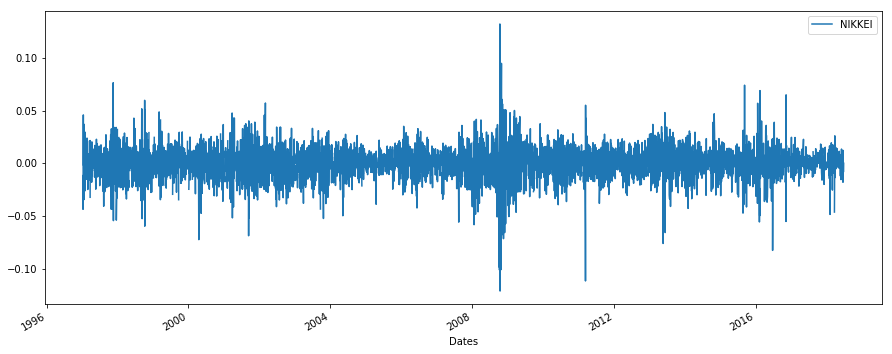

In [127]:
nikkei_log_returns.plot(figsize=(15,6))

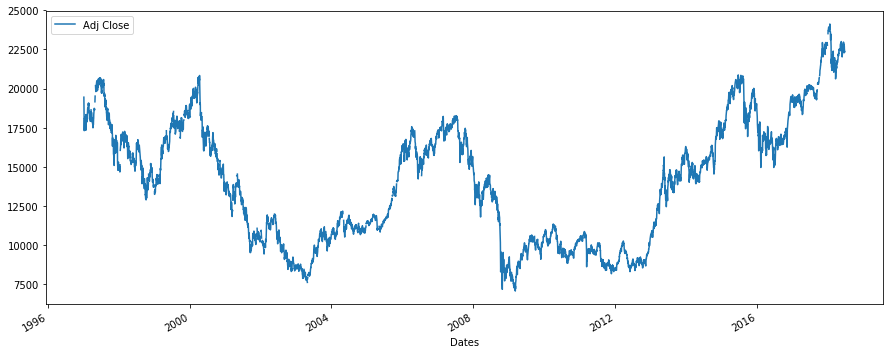

In [128]:
nikkei.plot(figsize=(15,6))

In [129]:
covariance_matrix1 = df5.cov() * 250
covariance_matrix1

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD,NIKKEI
EOD/IBM,0.075097,0.055155,0.039884,0.050878,0.026204,0.018773,0.005489
EOD/CSCO,0.055155,0.156987,0.068104,0.091378,0.038816,0.026404,0.006051
EOD/MSFT,0.039884,0.068104,0.097767,0.069617,0.030743,0.020569,0.005092
EOD/INTC,0.050878,0.091378,0.069617,0.145345,0.035604,0.023160,0.007157
EOD/NKE,0.026204,0.038816,0.030743,0.035604,0.102101,0.021324,0.005841
EOD/MCD,0.018773,0.026404,0.020569,0.023160,0.021324,0.057510,0.003738
NIKKEI,0.005489,0.006051,0.005092,0.007157,0.005841,0.003738,0.057271


In [130]:
covariance_matrix2 = df6.cov() * 250
covariance_matrix2

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD,NIKKEI ADJ CLOSE
EOD/IBM,4.197955e+05,3.340048e+04,1.102526e+05,4.831513e+04,1.468070e+05,3.423117e+05,4.309616e+06
EOD/CSCO,3.340048e+04,2.286040e+04,2.518284e+04,1.804359e+04,1.769022e+04,3.953396e+04,5.103213e+06
EOD/MSFT,1.102526e+05,2.518284e+04,7.283305e+04,3.190388e+04,6.968557e+04,1.511558e+05,1.010680e+07
EOD/INTC,4.831513e+04,1.804359e+04,3.190388e+04,1.991883e+04,2.799674e+04,5.936234e+04,5.368121e+06
EOD/NKE,1.468070e+05,1.769022e+04,6.968557e+04,2.799674e+04,8.536557e+04,1.750342e+05,8.695374e+06
EOD/MCD,3.423117e+05,3.953396e+04,1.511558e+05,5.936234e+04,1.750342e+05,3.958744e+05,1.578742e+07
NIKKEI ADJ CLOSE,4.309616e+06,5.103213e+06,1.010680e+07,5.368121e+06,8.695374e+06,1.578742e+07,3.840413e+09


c:\users\user\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


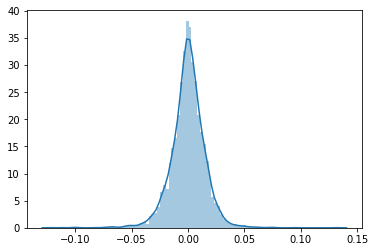

In [131]:
sns.distplot(nikkei_log_returns.dropna(), bins=100)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


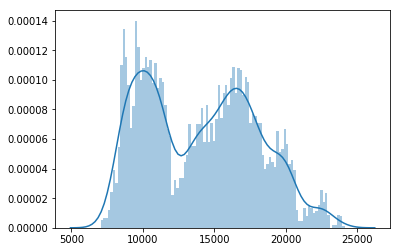

In [132]:
sns.distplot(nikkei.dropna(), bins=100)

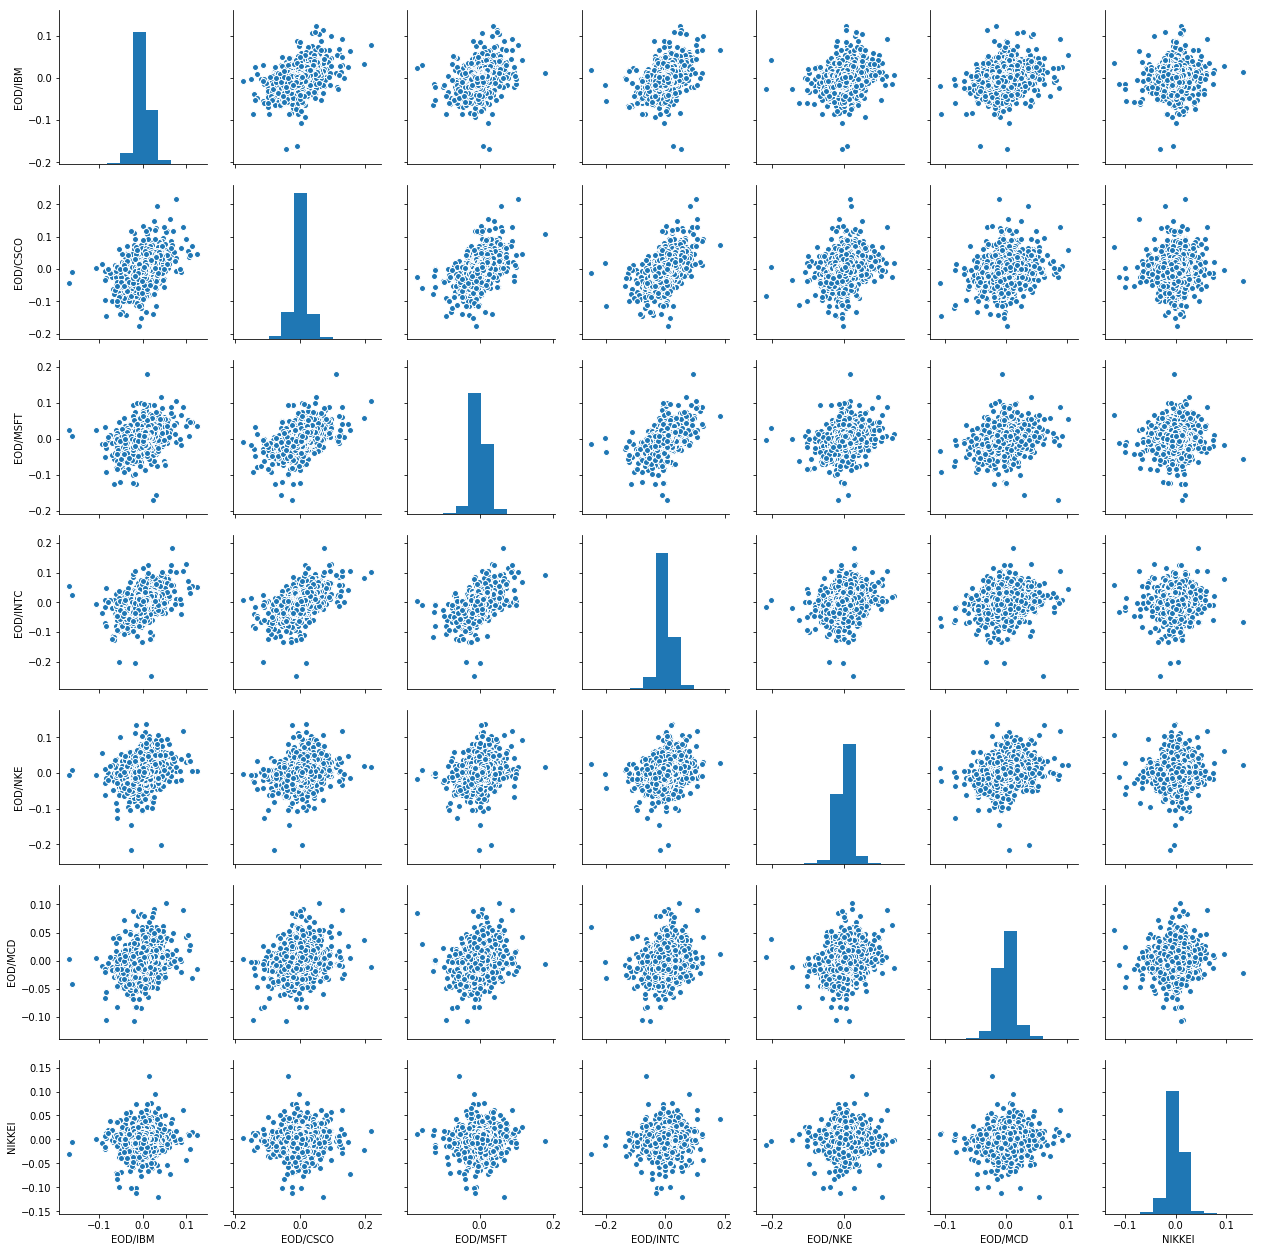

In [133]:
sns.pairplot(df5.dropna())

In [134]:
df5.corr()

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD,NIKKEI
EOD/IBM,1.000000,0.507975,0.465464,0.486984,0.299257,0.285659,0.083690
EOD/CSCO,0.507975,1.000000,0.549728,0.604939,0.306593,0.277889,0.063820
EOD/MSFT,0.465464,0.549728,1.000000,0.584008,0.307708,0.274317,0.068055
EOD/INTC,0.486984,0.604939,0.584008,1.000000,0.292267,0.253320,0.078440
EOD/NKE,0.299257,0.306593,0.307708,0.292267,1.000000,0.278275,0.076390
EOD/MCD,0.285659,0.277889,0.274317,0.253320,0.278275,1.000000,0.065134
NIKKEI,0.083690,0.063820,0.068055,0.078440,0.076390,0.065134,1.000000


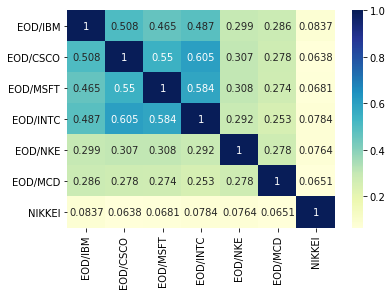

In [135]:
sns.heatmap(df5.corr(), annot=True, fmt=".3g", cmap="YlGnBu")

In [136]:
df6.corr()

,EOD/IBM,EOD/CSCO,EOD/MSFT,EOD/INTC,EOD/NKE,EOD/MCD,NIKKEI ADJ CLOSE
EOD/IBM,1.000000,0.340951,0.630530,0.528363,0.775508,0.839700,0.107332
EOD/CSCO,0.340951,1.000000,0.617161,0.845569,0.400452,0.415575,0.544644
EOD/MSFT,0.630530,0.617161,1.000000,0.837621,0.883766,0.890188,0.604311
EOD/INTC,0.528363,0.845569,0.837621,1.000000,0.678944,0.668498,0.613764
EOD/NKE,0.775508,0.400452,0.883766,0.678944,1.000000,0.952145,0.480240
EOD/MCD,0.839700,0.415575,0.890188,0.668498,0.952145,1.000000,0.404896
NIKKEI ADJ CLOSE,0.107332,0.544644,0.604311,0.613764,0.480240,0.404896,1.000000


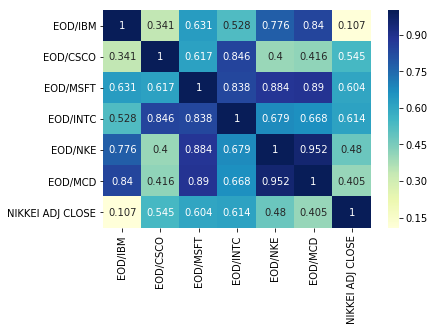

In [137]:
sns.heatmap(df6.corr(), annot=True, fmt=".3g", cmap="YlGnBu")

In [138]:
df5['EOD/IBM'].quantile(0.05)

-0.026524096187007337

In [139]:
df5['EOD/CSCO'].quantile(0.05)

-0.038532358666192194

In [140]:
df5['EOD/MSFT'].quantile(0.05)

-0.02933766099042589

In [141]:
df5['EOD/INTC'].quantile(0.05)

-0.036617655009881935

In [142]:
df5['EOD/NKE'].quantile(0.05)

-0.0288290820260817

In [143]:
df5['EOD/MCD'].quantile(0.05)

-0.02274743535061557

In [144]:
df5['NIKKEI'].quantile(0.05)

-0.024134527287920843